# Predicting Customer Churn Using Machine Learning


The objective of this project is to construct a supervised machine learning model for analyzing customer attrition within the Vodafone telecom company. Leveraging the provided dataset, the model aims to predict whether a customer is likely to churn or not, thus generating valuable insights into customer behavior. By accurately identifying potential churn, the initiative seeks to facilitate strategic interventions aimed at retaining customers effectively. The anticipated outcome of the project is to enable a more informed and proactive approach to customer relationship management within Vodafone, ultimately enhancing customer retention strategies.

In [160]:
from dotenv import dotenv_values  # Import the dotenv_values function from the dotenv package
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np   # Import numpy for numerical computations
import matplotlib.pyplot as plt  # Import matplotlib for data visualization
import seaborn as sns  # Import seaborn for enhanced data visualization
from scipy.stats import chi2_contingency  # Import chi2_contingency from scipy.stats for chi-square contingency table test
import warnings  # Import warnings module to handle warnings gracefully

warnings.filterwarnings('ignore')  # Filter out warnings to avoid cluttering the output
import matplotlib.pyplot as plt  # Import matplotlib again for plotting
import seaborn as sns  # Import seaborn again for plotting
from sklearn.metrics import confusion_matrix  # Import confusion_matrix from sklearn.metrics for evaluating classification performance

from sklearn.metrics import classification_report  # Import classification_report from sklearn.metrics for evaluating classification performance
from sklearn.pipeline import Pipeline  # Import Pipeline from sklearn.pipeline for creating data processing and modeling pipelines
from sklearn.compose import ColumnTransformer  # Import ColumnTransformer from sklearn.compose for preprocessing columns differently
from sklearn.impute import SimpleImputer  # Import SimpleImputer from sklearn.impute for handling missing values
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # Import scalers from sklearn.preprocessing for feature scaling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder  # Import encoders from sklearn.preprocessing for categorical encoding
from sklearn.preprocessing import FunctionTransformer  # Import FunctionTransformer from sklearn.preprocessing for custom transformations


In [161]:
import pyodbc  # Import pyodbc for connecting to a SQL Server database
from dotenv import load_dotenv  # Import load_dotenv function from dotenv for loading environment variables from .env file
import os  # Import os module for interacting with the operating system

# Load environment variables from .env file
load_dotenv()

# Retrieve environment variables
SERVER_NAME = os.getenv('SERVER_NAME')  # Retrieve server name from environment variables
USER = os.getenv('USER')  # Retrieve username from environment variables
PASSWORD = os.getenv('PASSWORD')  # Retrieve password from environment variables
DATABASE_NAME = os.getenv('DATABASE_NAME')  # Retrieve database name from environment variables

# Construct the connection string
connection_string = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={SERVER_NAME};DATABASE={DATABASE_NAME};UID={USER};PWD={PASSWORD}'

# Establish connection
connection = pyodbc.connect(connection_string)  # Connect to the SQL Server database using the constructed connection string

# Define table name
TABLE_NAME = 'dbo.LP2_Telco_churn_first_3000'  # Define the name of the table in the database


In [162]:
## loading of the first 3000 rows of dataset
query = "Select * from dbo.LP2_Telco_churn_first_3000"  # Define SQL query to select all columns from the specified table

data3000 = pd.read_sql(query, connection)  # Execute SQL query and load results into a pandas DataFrame
data3000.head()  # Display the first few rows of the loaded DataFrame


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [163]:
 # Save the first 3000 rows of the DataFrame to a CSV file without including the index
data3000.to_csv("churnfirst3000.csv", index=False) 

In [164]:
# Load the second 2000 rows of the dataset from a CSV file into a pandas DataFrame
data2000 = pd.read_csv('A:/Azubi-Data-Analytics-LP2/Data/Telco-churn-last-2000.csv')  
data2000.head()  # Display the first few rows of the loaded DataFrame


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [165]:
# Concatenate the first 3000 rows DataFrame and the second 2000 rows DataFrame along the rows (axis=0)
df = pd.concat([data3000, data2000], axis=0)  
df.head()  # Display the first few rows of the concatenated DataFrame


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [166]:
##check the tail
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,NaN
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3,NaN
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7,NaN
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,NaN
1999,1699-TLDLZ,Female,0,Yes,Yes,16,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,301.55,NaN


In [167]:
## checking the number of entries in the entire dataset and the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5000 non-null   object 
 1   gender            5000 non-null   object 
 2   SeniorCitizen     5000 non-null   int64  
 3   Partner           5000 non-null   object 
 4   Dependents        5000 non-null   object 
 5   tenure            5000 non-null   int64  
 6   PhoneService      5000 non-null   object 
 7   MultipleLines     4731 non-null   object 
 8   InternetService   5000 non-null   object 
 9   OnlineSecurity    4349 non-null   object 
 10  OnlineBackup      4349 non-null   object 
 11  DeviceProtection  4349 non-null   object 
 12  TechSupport       4349 non-null   object 
 13  StreamingTV       4349 non-null   object 
 14  StreamingMovies   4349 non-null   object 
 15  Contract          5000 non-null   object 
 16  PaperlessBilling  5000 non-null   object 
 17  

In [168]:
##checking for null valuess
df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
dtype: int64

In [169]:
## checking for duplicates
df.duplicated().value_counts()

False    5000
Name: count, dtype: int64

In [170]:
## checking uniques 
df.nunique()

customerID          5000
gender                 2
SeniorCitizen          2
Partner                4
Dependents             4
tenure                73
PhoneService           4
MultipleLines          5
InternetService        3
OnlineSecurity         5
OnlineBackup           5
DeviceProtection       5
TechSupport            5
StreamingTV            5
StreamingMovies        5
Contract               3
PaperlessBilling       4
PaymentMethod          4
MonthlyCharges      2031
TotalCharges        4823
Churn                  2
dtype: int64

In [171]:
## decriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5000.0,0.15960,0.366271,0.00,0.0000,0.000000,0.000000,1.00
tenure,5000.0,32.25760,24.635483,0.00,8.0000,29.000000,55.250000,72.00
MonthlyCharges,5000.0,64.78177,30.141924,18.25,35.4875,70.400002,89.949997,118.75


Observations
- We can see from the mean and medians that our data is not normally distributed since the mean and median arent really close
- On the average, Total Charges is around 2,302
- On the average, Monthly charges is around 65

Insights Derived

1. Dataset has 5034 entries
2. Dataset contains both object and int data types
3. Columns like OnlineSecurity, OnlineBackup, DeviceProtection<TechSupport, StreamingTv, and StreamingMovies have 651 null entries
4. Multiple lines has 269 null entries and churn has 1 null entry


In [172]:
## checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5000 non-null   object 
 1   gender            5000 non-null   object 
 2   SeniorCitizen     5000 non-null   int64  
 3   Partner           5000 non-null   object 
 4   Dependents        5000 non-null   object 
 5   tenure            5000 non-null   int64  
 6   PhoneService      5000 non-null   object 
 7   MultipleLines     4731 non-null   object 
 8   InternetService   5000 non-null   object 
 9   OnlineSecurity    4349 non-null   object 
 10  OnlineBackup      4349 non-null   object 
 11  DeviceProtection  4349 non-null   object 
 12  TechSupport       4349 non-null   object 
 13  StreamingTV       4349 non-null   object 
 14  StreamingMovies   4349 non-null   object 
 15  Contract          5000 non-null   object 
 16  PaperlessBilling  5000 non-null   object 
 17  

In [173]:
# Checking unique entries in each column
for column in df.columns:
    unique_entries = df[column].unique()
    print(f"Column '{column}' has {len(unique_entries)} unique entries:")
    print(unique_entries[:])
    print()

Column 'customerID' has 5000 unique entries:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']

Column 'gender' has 2 unique entries:
['Female' 'Male']

Column 'SeniorCitizen' has 2 unique entries:
[0 1]

Column 'Partner' has 4 unique entries:
[True False 'No' 'Yes']

Column 'Dependents' has 4 unique entries:
[False True 'No' 'Yes']

Column 'tenure' has 73 unique entries:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column 'PhoneService' has 4 unique entries:
[False True 'Yes' 'No']

Column 'MultipleLines' has 6 unique entries:
[None False True 'Yes' 'No' 'No phone service']

Column 'InternetService' has 3 unique entries:
['DSL' 'Fiber optic' 'No']

Column 'OnlineSecurity' has 6 unique entries:
[False True None 'No' 'No internet service' 'Yes']

Column 'OnlineBackup' has 6 u

In [174]:
def map_to_boolean(df):
    df["Partner"] = df["Partner"].map({True: "Yes", False: "No", "Yes": "Yes", "No": "No"})
    df["PhoneService"] = df["PhoneService"].map({True: "Yes", False: "No", "Yes": "Yes", "No": "No"})
    df["Dependents"] = df["Dependents"].map({True: "Yes", False: "No","Yes": "Yes", "No": "No"})
    df["MultipleLines"] = df["MultipleLines"].map({True: "Yes", False: "No","Yes": "Yes", "No": "No","No phone service": "No phone service"})
    df["InternetService"] = df["InternetService"].map({"No": "No", "DSL": "DSL", "Fiber optic": "Fiber optic"})
    df["OnlineSecurity"] = df["OnlineSecurity"].map({True: "Yes", False: "No", "Yes":"Yes", "No":"No", "No internet service": "No internet service"})
    df["OnlineBackup"] = df["OnlineBackup"].map({True: "Yes", False: "No", "Yes":"Yes", "No":"No","No internet service": "No internet service"})
    df["DeviceProtection"] = df["DeviceProtection"].map({True: "Yes", False: "No", "Yes":"Yes", "No":"No", "No internet service": "No internet service"})
    df["TechSupport"] = df["TechSupport"].map({True: "Yes", False: "No", "Yes":"Yes", "No":"No", "No internet service": "No internet service"})
    df["StreamingTV"] = df["StreamingTV"].map({True: "Yes", False: "No", "Yes":"Yes", "No":"No", "No internet service": "No internet service"})
    df["StreamingMovies"] = df["StreamingMovies"].map({True: "Yes", False: "No", "Yes":"Yes", "No":"No", "No internet service": "No internet service"})
    df["PaperlessBilling"] = df["PaperlessBilling"].map({True: "Yes", False: "No", "Yes":"Yes", "No":"No"})
    df["Churn"] = df["Churn"].map({True: "Yes", False: "No", "Yes":"Yes", "No":"No"})

    return df

# Example usage
df = map_to_boolean(df)

In [175]:
df.isna().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines        269
InternetService        0
OnlineSecurity       651
OnlineBackup         651
DeviceProtection     651
TechSupport          651
StreamingTV          651
StreamingMovies      651
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           5
Churn               2001
dtype: int64

In [176]:
## checking unique entries in each column
for column in df.columns:
    unique_entries = df[column].unique()
    print(f"Column '{column}' has {len(unique_entries)} unique entries:")
    print(unique_entries[:])
    print()

Column 'customerID' has 5000 unique entries:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']

Column 'gender' has 2 unique entries:
['Female' 'Male']

Column 'SeniorCitizen' has 2 unique entries:
[0 1]

Column 'Partner' has 2 unique entries:
['Yes' 'No']

Column 'Dependents' has 2 unique entries:
['No' 'Yes']

Column 'tenure' has 73 unique entries:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column 'PhoneService' has 2 unique entries:
['No' 'Yes']

Column 'MultipleLines' has 4 unique entries:
[nan 'No' 'Yes' 'No phone service']

Column 'InternetService' has 3 unique entries:
['DSL' 'Fiber optic' 'No']

Column 'OnlineSecurity' has 4 unique entries:
['No' 'Yes' nan 'No internet service']

Column 'OnlineBackup' has 4 unique entries:
['Yes' 'No' nan 'No internet service']

Co

In [177]:
for col in df.columns:
    df_ = df[col].value_counts()
    print(f"Value counts for column '{col}':\n{df_}\n")

Value counts for column 'customerID':
customerID
7590-VHVEG    1
8276-MQBYC    1
0840-DFEZH    1
8380-MQINP    1
9817-APLHW    1
             ..
8388-DMKAE    1
1219-NNDDO    1
4829-AUOAX    1
5364-XYIRR    1
1699-TLDLZ    1
Name: count, Length: 5000, dtype: int64

Value counts for column 'gender':
gender
Male      2533
Female    2467
Name: count, dtype: int64

Value counts for column 'SeniorCitizen':
SeniorCitizen
0    4202
1     798
Name: count, dtype: int64

Value counts for column 'Partner':
Partner
No     2594
Yes    2406
Name: count, dtype: int64

Value counts for column 'Dependents':
Dependents
No     3521
Yes    1479
Name: count, dtype: int64

Value counts for column 'tenure':
tenure
1     436
72    272
2     178
3     141
4     132
     ... 
59     39
39     36
36     34
44     32
0       8
Name: count, Length: 73, dtype: int64

Value counts for column 'PhoneService':
PhoneService
Yes    4538
No      462
Name: count, dtype: int64

Value counts for column 'MultipleLines':
Multi

In [178]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric with errors set to 'coerce'

In [179]:
df.columns.unique()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

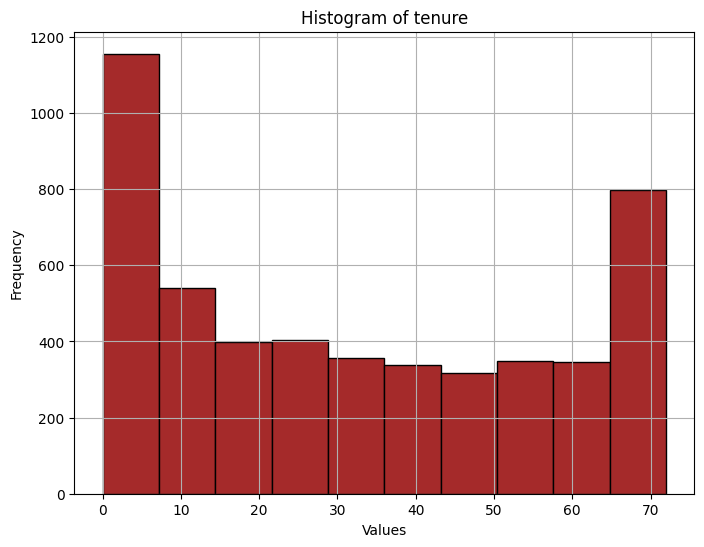

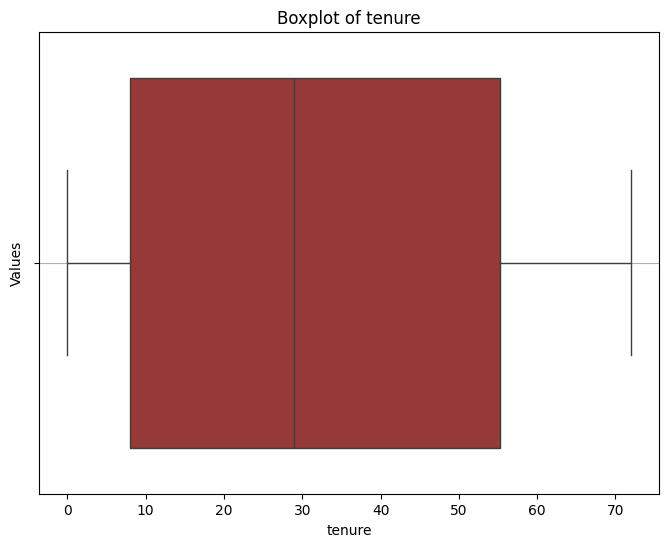

In [180]:
# Create a histogram for tenure
plt.figure(figsize=(8, 6))
plt.hist(df['tenure'], bins=10, color='brown', edgecolor='black')
plt.title('Histogram of tenure')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot for tenure
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['tenure'], color='brown', orient='v')
plt.title('Boxplot of tenure')
plt.ylabel('Values')
plt.grid(True, axis='y')
plt.show()


Observations for tenure column
The histogram shows a bimodal distribution with two distinct peaks each representing two different groups with higher frequencies.
The box-plot shows that minimum tenure is 0 and maximum 72 with a median of 29
there are no outliers

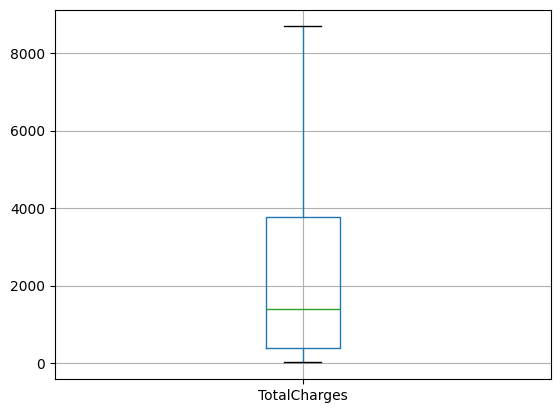

In [181]:
## checking the distribution in the Total charges
df.boxplot(column='TotalCharges')
plt.show()

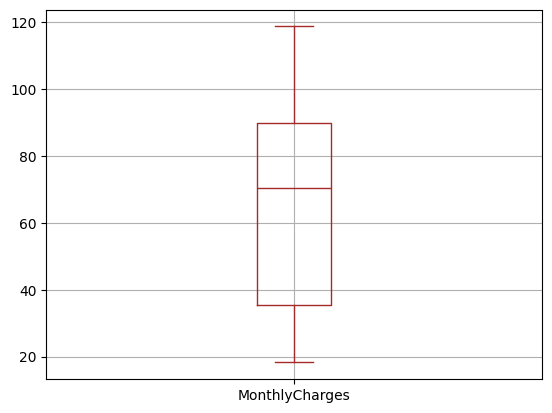

In [182]:
## visualizing the distribution of monthly charges
df.boxplot(column='MonthlyCharges', color='brown')
plt.show()

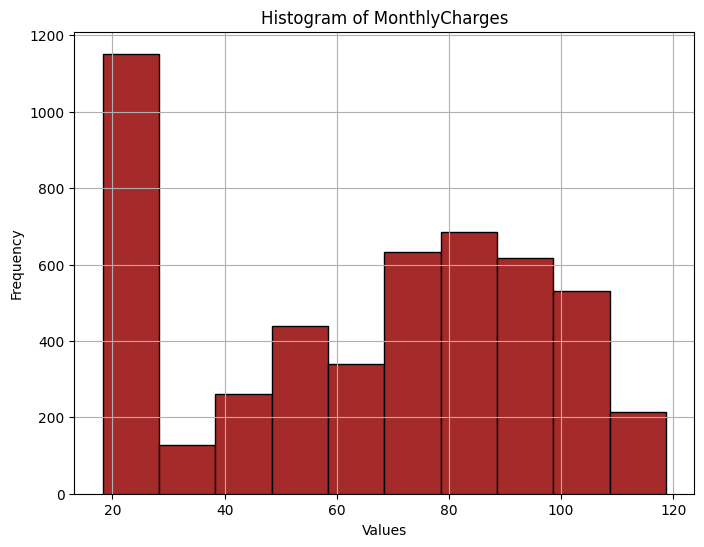

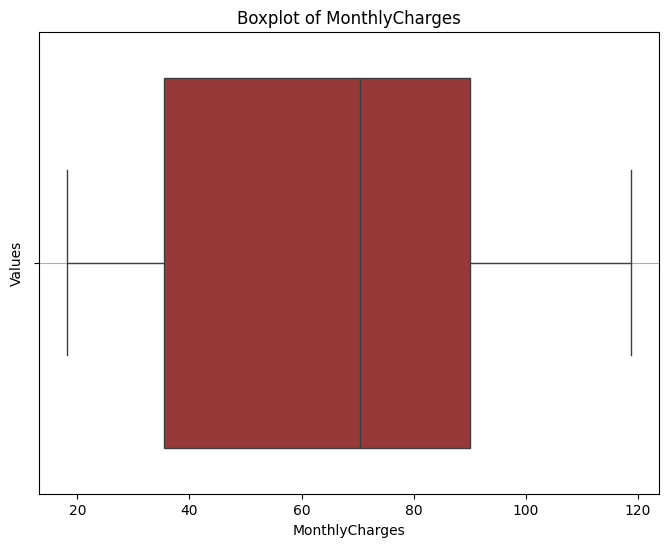

In [183]:
# Create a histogram for MonthlyCharges
plt.figure(figsize=(8, 6))
plt.hist(df['MonthlyCharges'], bins=10, color='brown', edgecolor='black')
plt.title('Histogram of MonthlyCharges')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a boxplot for MonthlyCharges
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MonthlyCharges'], color='brown', orient='v')
plt.title('Boxplot of MonthlyCharges')
plt.ylabel('Values')
plt.grid(True, axis='y')
plt.show()

Observations
- The histogram shows a unimodal distribution with one distinct peak showing a distinct group with a high frequency.
- from the boxplot most of the values fall between the median of 70.9 and a minimum of 18.4
- there are no outliers

In [184]:
## Creating numeric columns and categorical columns
numeric_cols = df.select_dtypes(include=["int","float"])
categorical_cols = df.select_dtypes(include=["object"])


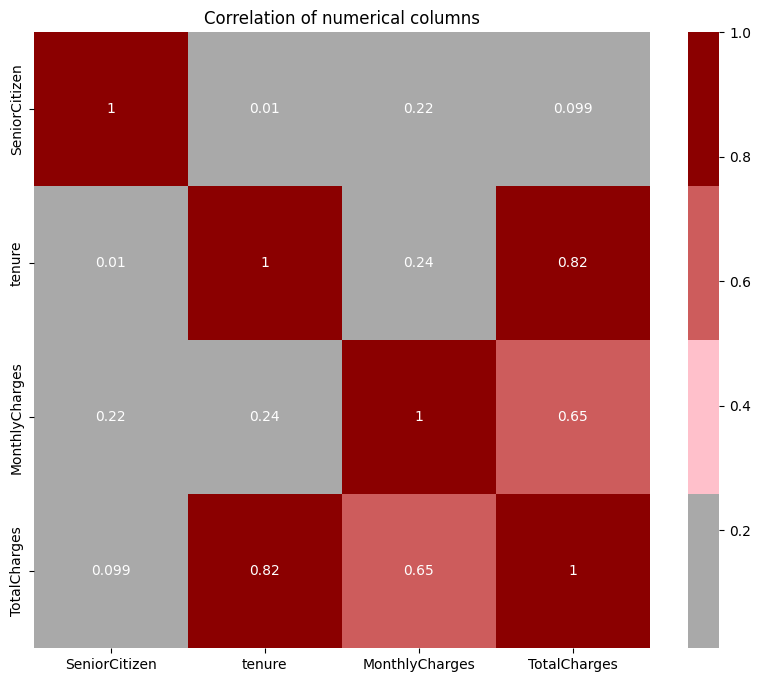

In [185]:
## checking correlation between the numerics
corr_matrix = numeric_cols.corr()
colors = ["#A9A9A9","#FFC0CB", "#CD5C5C","#8B0000"]
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap=colors, square=True)
plt.title("Correlation of numerical columns")
plt.show()

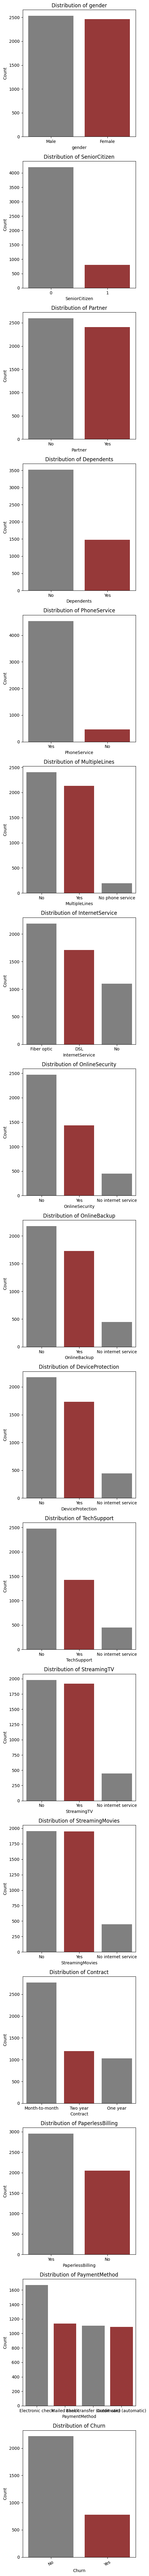

In [186]:

## Plotting the distributions in categorical columns
def plot_subplots(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(5, 5*num_cols))
    
    for i, col in enumerate(columns):
        counts = df[col].value_counts()
        sns.barplot(x=counts.index, y=counts.values, ax=axes[i],palette={"grey","Brown"})
        plt.xticks(rotation=30)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
    plt.tight_layout()
    plt.show()

# Example usage
columns_to_plot = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines" , "InternetService", "OnlineSecurity", "OnlineBackup", 
                   "DeviceProtection", "TechSupport", "StreamingTV", 
                   "StreamingMovies", "Contract", "PaperlessBilling", 
                   "PaymentMethod", "Churn"]
plot_subplots(df, columns_to_plot)



1. What is the total churn rate?

<Axes: ylabel='count'>

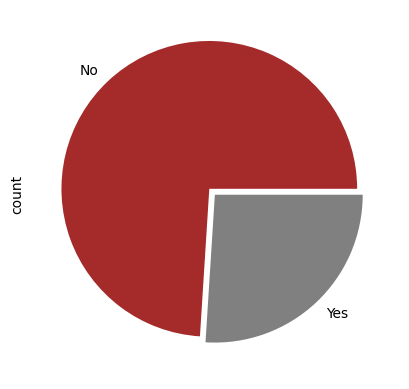

In [187]:
df["Churn"].value_counts().plot.pie(explode=(0.05,0.005), colors=['brown', "grey"])

2. What is the churn rate among different demographic groups (e.g., gender, SeniorCitizen status)?

In [188]:
df.groupby("gender")["Churn"].value_counts()

gender  Churn
Female  No       1079
        Yes       384
Male    No       1140
        Yes       396
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

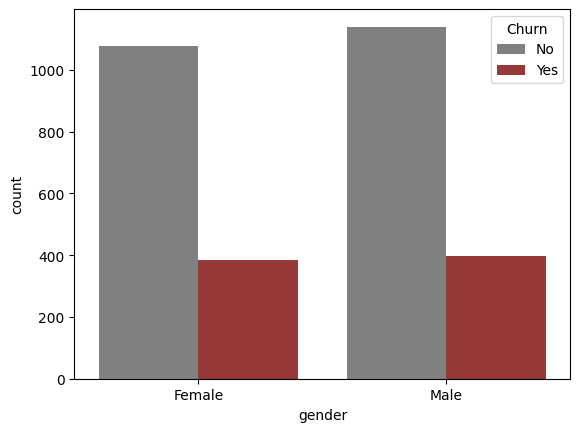

In [189]:
sns.countplot(data=df, x="gender", hue="Churn", palette={"No":"grey", "Yes":"Brown"})

3. How does the citizen level affect their likelihood to churn?

<Axes: xlabel='SeniorCitizen', ylabel='count'>

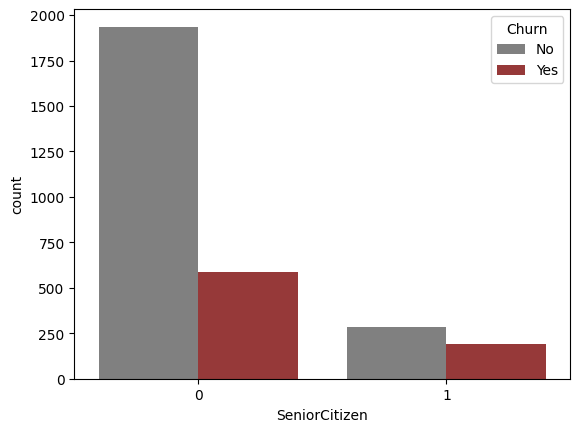

In [190]:
sns.countplot(data=df, x="SeniorCitizen", hue="Churn",palette={"No":"grey", "Yes":"Brown"})

4. Are customers with Phone Services more likely to churn?

<Axes: xlabel='PhoneService', ylabel='count'>

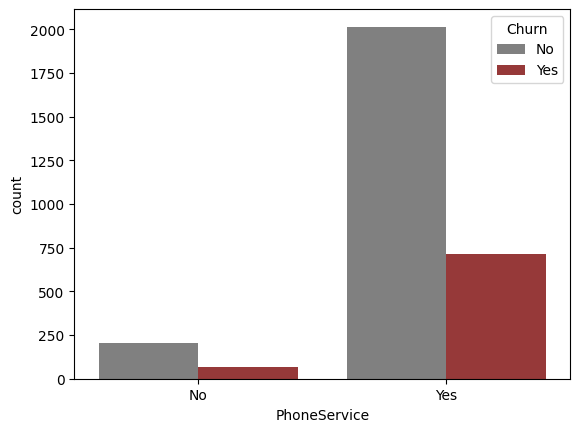

In [191]:
sns.countplot(data=df, x="PhoneService", hue="Churn",palette={"No":"grey", "Yes":"Brown"})

5. How do contract terms (e.g., Contract length, PaperlessBilling) influence churn?

<Axes: xlabel='Contract', ylabel='count'>

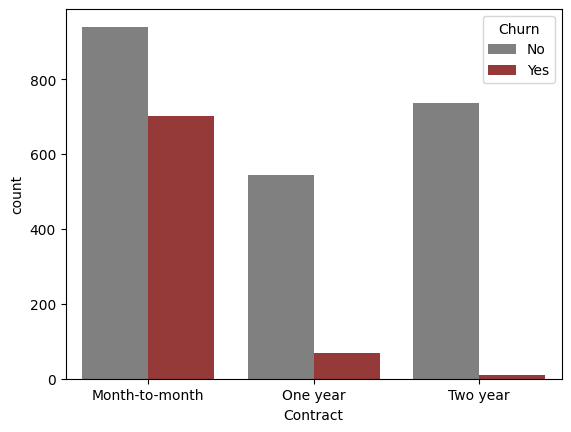

In [192]:
sns.countplot(data=df, x="Contract", hue="Churn",palette={"No":"grey", "Yes":"Brown"})

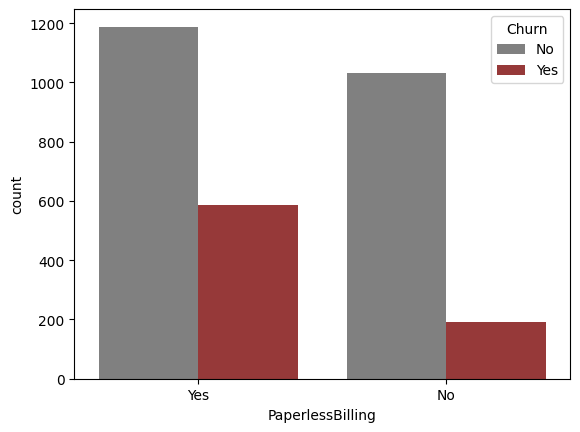

In [193]:
sns.countplot(data=df, x="PaperlessBilling", hue="Churn",palette={"No":"grey", "Yes":"Brown"})
plt.show()

6. What role do payment methods play in customer churn?

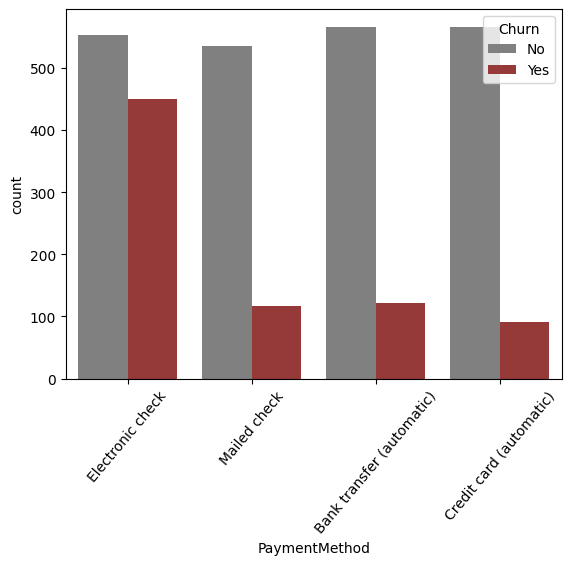

In [194]:
sns.countplot(data=df, x="PaymentMethod", hue="Churn",palette={"No":"grey", "Yes":"Brown"})
plt.xticks(rotation=50)
plt.show()

Insights from analytical questions
1. Customers with more contract terms have lesser churning rate (Probably long term contracts looks appealing as compared to short term)
2. Churning based on gender is almost the same
3. Customers having phone services churn more as compared to those who do not have phone services
4. Customers who have paperless billing churn more (Probably the company need to check their paperless biling systems)
5. Customers who pay their bills with electronic checks churn more 

In [195]:
df["TechSupport"].value_counts()

TechSupport
No                     2477
Yes                    1426
No internet service     446
Name: count, dtype: int64

## Hypothesis Testing

Chi square test will be used for hypothesis testing. The chi-square test helps you assess whether there is evidence to reject the null hypothesis that the two categorical variables are independent. If the p-value is low, you can conclude that there is a significant association between the variables. If the p-value is high, you fail to reject the null hypothesis, suggesting that there is no significant association.

In [196]:

# Creating a contigency table
contingency_table = pd.crosstab(df['Contract'], df['Churn'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# printing results of the p-value
print("P-value:", p)

# printing Results of the t-test
# having alpha to be 0.05(level of significance)
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis - There is a significant relationship between Contract terms and Churn.")
else:
    print("Fail to reject the null hypothesis - There is no significant relationship between Contract terms and Churn.")

P-value: 1.2608778315145474e-118
Reject the null hypothesis - There is a significant relationship between Contract terms and Churn.


Observation
- We can see from the results that our p-value is wayy lesser than the significance level. Hence we can conclude that the null     hypothesis we have is less significant and hence we have enough confidence to reject the null hypothesis.
- This means our alternative hypothesis is actually true (There is a relationship between Contracts and Churn)

## Data Preperation

#### Checking if the dataset is balanced

In [197]:
# checking distribution of the Churn column
df["Churn"].value_counts()

Churn
No     2219
Yes     780
Name: count, dtype: int64

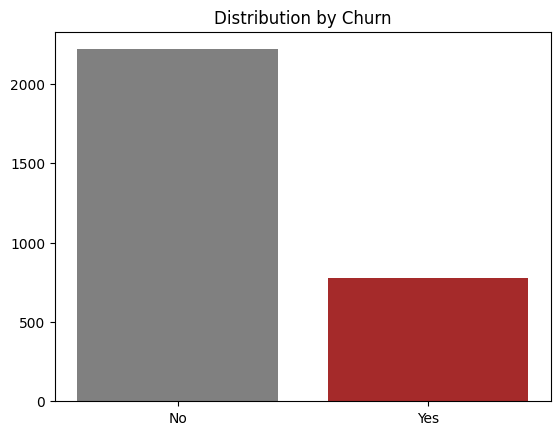

In [198]:
## checking if data is balanced
colors = ['brown' if x == 'Yes' else 'grey' for x in df['Churn'].value_counts().index]
plt.bar(df['Churn'].value_counts().index, df['Churn'].value_counts(), color=colors)
plt.title("Distribution by Churn")
plt.show()

Observation
- From the visualization above, we can see that the target is not balanced. 

Solutions
- Using models that can handle imbalanced datasets eg: RandomForests, XGBoost, Catboost, Adaboost, LogisticRegressor
- Instead of using accuracy, which can be misleading for imbalanced datasets, we will consider using metrics like precision, recall, F1-score
- Collecting more data for the minority class which is Churned customers("yes") 

In [199]:
## Dropping the missing rows in Churn
df.dropna(subset=["Churn"], inplace=True)

In [200]:
## checking if the values have been dropped
df["Churn"].isna().sum()

0

In [201]:
## dropping customerID
df = df.drop(columns=["customerID"])

In [202]:
df["tenure"].value_counts()

tenure
1     257
72    166
2     107
3      85
71     80
     ... 
55     21
39     20
36     18
44     17
0       5
Name: count, Length: 73, dtype: int64

In [203]:
df["Contract"].value_counts()

Contract
Month-to-month    1641
Two year           745
One year           613
Name: count, dtype: int64

In [204]:
## Encoding the label 
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

In [205]:
df.isna().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64

In [206]:
numeric_cols.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.850000,29.850000
1,0,34,56.950001,1889.500000
2,0,2,53.849998,108.150002
3,0,45,42.299999,1840.750000
4,0,2,70.699997,151.649994


In [207]:
categorical_cols.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [208]:
## Creating numeric columns and categorical columns
numeric_cols = ["MonthlyCharges", "TotalCharges", "tenure"]
categorical_cols = ["gender", "SeniorCitizen", "Contract", "PaymentMethod", "PaperlessBilling", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity"]


In [209]:
categorical_cols

['gender',
 'SeniorCitizen',
 'Contract',
 'PaymentMethod',
 'PaperlessBilling',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity']

In [210]:
numeric_cols

['MonthlyCharges', 'TotalCharges', 'tenure']

In [211]:
## Splitting dataset into features and target values
X = df.drop(columns=["Churn"], axis=1)
y = df["Churn"]

In [212]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [213]:
## Label Encoding
Label_enc = LabelEncoder()
y_train_encoded = Label_enc.fit_transform(y_train)

## we use only tranform since the yes or no has already been learn in fittranform
y_test_encoded = Label_enc.transform(y_test)


In [214]:
## creating pipeline for Preprocessing of categorical and numeric columns 
numerical_pipeline = Pipeline(steps=[ 
    ("num_imputer", SimpleImputer(strategy="median")), 
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ("num_pipeline", numerical_pipeline, numeric_cols),
    ("cat_pipeline",categorical_pipeline, categorical_cols)
])

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42)),
]


In [216]:
all_pipeline={}

for model_name, classifier in models:

    final_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", classifier)
    ])

    # fit data to pipeline
    final_pipeline.fit(X_train, y_train_encoded)

    all_pipeline[model_name] = final_pipeline
    print(f"{model_name} model is trained")

Logistic Regression model is trained
Decision Tree model is trained
Random Forest model is trained
XGBoost model is trained


In [217]:
report_data = []

for model_name, pipeline in all_pipeline.items():
    # Predict the target values
    y_pred = pipeline.predict(X_test)
    
    # Get the classification report
    report = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Store the model name and report data
    report_data.append({"model": model_name, "report": report})

In [218]:
report_data

[{'model': 'Logistic Regression',
  'report': {'0': {'precision': 0.8413361169102297,
    'recall': 0.901565995525727,
    'f1-score': 0.8704103671706264,
    'support': 447.0},
   '1': {'precision': 0.6363636363636364,
    'recall': 0.5032679738562091,
    'f1-score': 0.5620437956204379,
    'support': 153.0},
   'accuracy': 0.8,
   'macro avg': {'precision': 0.738849876636933,
    'recall': 0.702416984690968,
    'f1-score': 0.7162270813955322,
    'support': 600.0},
   'weighted avg': {'precision': 0.7890681343708484,
    'recall': 0.8,
    'f1-score': 0.7917768914253284,
    'support': 600.0}}},
 {'model': 'Decision Tree',
  'report': {'0': {'precision': 0.832579185520362,
    'recall': 0.8232662192393736,
    'f1-score': 0.8278965129358831,
    'support': 447.0},
   '1': {'precision': 0.5,
    'recall': 0.5163398692810458,
    'f1-score': 0.5080385852090032,
    'support': 153.0},
   'accuracy': 0.745,
   'macro avg': {'precision': 0.6662895927601811,
    'recall': 0.6698030442602

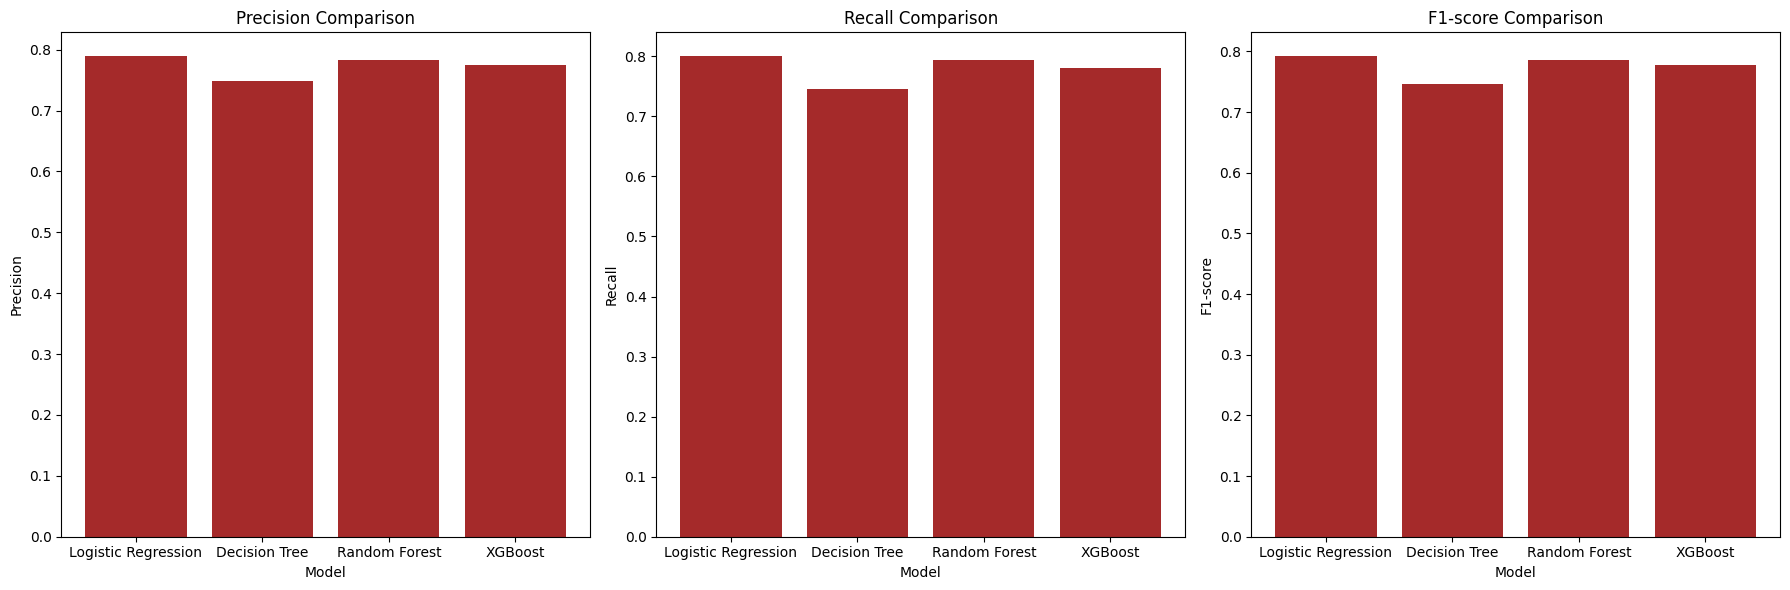

In [219]:
# Plotting the precision, recall, and f1-score for each model and comparing
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(["precision", "recall", "f1-score"]):
    ax[i].bar([data["model"] for data in report_data], [data["report"]["weighted avg"][metric] for data in report_data], color="brown")
    ax[i].set_title(f"{metric.capitalize()} Comparison")
    ax[i].set_xlabel("Model")
    ax[i].set_ylabel(metric.capitalize())

plt.tight_layout()
plt.show()

Observations
- We can see that DecisionTree has the highest precision among the four with precision of about 84%
- Logistic regressor follows closely

In [220]:
from sklearn.model_selection import GridSearchCV

best_params_dict = {}
# Create pipelines for each model
pipelines = [
    ("XGBClassifier", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(random_state=42))
    ])),
    ("Logistic Regression", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(random_state=42))
    ])),
    ("Decision Tree", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier(random_state=42))
    ])),
    ("Random Forest", Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier(random_state=42))
    ]))
]

# Define hyperparameter grids for each model
param_grids = {
    "XGBClassifier": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.3]
    },
    "Logistic Regression": {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.1, 1, 10]
    },
    "Decision Tree": {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 5, 10, 20]
    },
    "Random Forest": {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 5, 10, 20]
    }
}

# Perform GridSearchCV for each model
for model_name, pipeline in pipelines:
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train_encoded)
    best_params_dict[model_name] = grid_search.best_params_
##best params for each model    
best_params_dict


{'XGBClassifier': {'classifier__learning_rate': 0.01,
  'classifier__max_depth': 5,
  'classifier__n_estimators': 300},
 'Logistic Regression': {'classifier__C': 0.1, 'classifier__penalty': 'l2'},
 'Decision Tree': {'classifier__criterion': 'entropy',
  'classifier__max_depth': 5},
 'Random Forest': {'classifier__max_depth': 5,
  'classifier__n_estimators': 200}}

In [221]:
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd

balanced_metric_table = pd.DataFrame(columns=["model", "precision", "recall", "f1-score"])

for model_name, classifier in models:
    final_balanced_pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("smote-sampler", SMOTE(random_state=42)),
        ("classifier", classifier)
    ])
    
    # fit data to pipeline
    final_balanced_pipeline.fit(X_train, y_train_encoded)

    # Add all pipelines into the all_balanced_pipeline dictionary
    all_balanced_pipeline[model_name] = final_balanced_pipeline
    
    # predicting on evaluation set
    y_pred = final_balanced_pipeline.predict(X_test)

    # confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)

    # Adding all confusion matrix into the all_confusion_matrix dictionary
    all_confusion_matrix[model_name] = conf_matrix

    # generating classification report for each model or pipeline
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # getting all metrics
    accuracy = metrics["accuracy"]
    precision = metrics["weighted avg"]["precision"]
    recall = metrics["weighted avg"]["recall"]
    f1_score = metrics["weighted avg"]["f1-score"]
    
    print(f"{model_name} model is trained")
    
    # add key metrics to the metrics table
    balanced_metric_table.loc[len(balanced_metric_table)] = [model_name, precision, recall, f1_score]

balanced_metric_table.sort_values(by="f1-score", ascending=False)


Logistic Regression model is trained
Decision Tree model is trained
Random Forest model is trained
XGBoost model is trained


,model,precision,recall,f1-score
2,Random Forest,0.799001,0.793333,0.795827
3,XGBoost,0.798925,0.786667,0.791482
0,Logistic Regression,0.826168,0.760000,0.774221
1,Decision Tree,0.774071,0.770000,0.771892


In [222]:
conf_mat_balanced = all_confusion_matrix["Logistic Regression"]

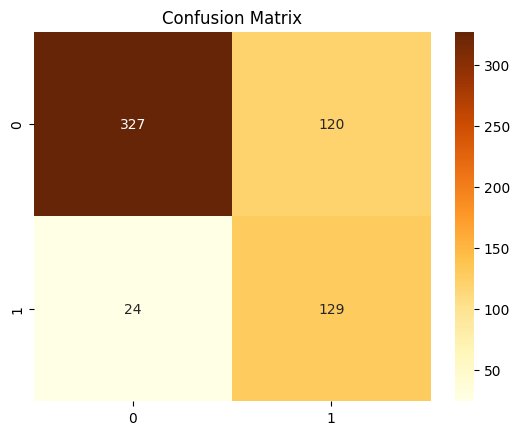

In [223]:
## Confusion matrix
sns.heatmap(conf_mat_balanced, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Confusion Matrix")
plt.show()

In [224]:
from sklearn.tree import DecisionTreeClassifier



decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fit the pipeline on the training data
decision_tree_pipeline.fit(X_train, y_train_encoded) 


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Contract', 'PaymentMethod',
                                                   'PaperlessBilling',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [225]:
predict = decision_tree_pipeline.predict(X_test)     # Making predictions using the trained decision tree model on the test data


In [226]:
# Generate a classification report
report = classification_report(y_test_encoded, predict)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.83      0.82      0.83       447
           1       0.50      0.52      0.51       153

    accuracy                           0.74       600
   macro avg       0.67      0.67      0.67       600
weighted avg       0.75      0.74      0.75       600



In [227]:
_# Accessing the unique classes learned by the LabelEncoder
unique_classes = labelEncoder.classes_
unique_classes

array(['bird', 'cat', 'dog'], dtype='<U4')

In [228]:
from sklearn.svm import SVC



SVC_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc_classifier', SVC(random_state=42))
])

# Fit the pipeline on the training data
SVC_pipeline.fit(X_train, y_train_encoded) 

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Contract', 'PaymentMethod',
                                                   'PaperlessBilling',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity'])])),
                ('svc_classifier', SVC(random_state=42))])

In [229]:
svc_pred = SVC_pipeline.predict(X_test)     # Making predictions using the trained decision tree model on the test data

In [230]:
# Generate a classification report
report_svc = classification_report(y_test_encoded, svc_pred)

# Print the classification report
print(report_svc)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       447
           1       0.64      0.47      0.54       153

    accuracy                           0.80       600
   macro avg       0.74      0.69      0.71       600
weighted avg       0.79      0.80      0.79       600



In [231]:
from sklearn.ensemble  import RandomForestClassifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('rf_classfier',RandomForestClassifier(random_state=42))
    ])
rf_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Contract', 'PaymentMethod',
                                                   'PaperlessBilling',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity'])])),
                ('rf_classfier', RandomForestClassifier(random_state=42))])

In [232]:
rf_pred = rf_pipeline.predict(X_test)

In [233]:
# Generate a classification report
report_rf = classification_report(y_test_encoded, rf_pred)

# Print the classification report
print(report_rf)

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       447
           1       0.62      0.50      0.55       153

    accuracy                           0.79       600
   macro avg       0.73      0.70      0.71       600
weighted avg       0.78      0.79      0.79       600



In [234]:
from sklearn.linear_model import LogisticRegression
# Define the KNN pipeline
regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),        # Preprocessing steps
    ('Logistic Regression',LogisticRegression(random_state=42))# KNN classifier
    ])
# Set random seed for the entire Python environment

# Fit the KNN pipeline on the training data
regression_pipeline.fit(X_train, y_train_encoded)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MonthlyCharges',
                                                   'TotalCharges', 'tenure']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Contract', 'PaymentMethod',
                                                   'PaperlessBilling',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity'])])),
                ('Logistic Regression', LogisticRegression(random_state=42))])